In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Raw data access
import os
os.chdir('/content/drive/MyDrive/Meta_Analysis_Ajit_Sir/ML_24_Dec/GSE233233_Zhongza_9')

In [ ]:
!pip install umap-learn

In [ ]:
ls

Count_Data_GSE233233_Zhongza_9.csv  Meta_Data_GSE233233_Zhongza_9.csv
GSE233233_Zhongza_9.ipynb           Normalized_GSE233233_Zhongza_9.csv
hTree_GSE233233_QZ_006_5_X.pdf      Umap_GSE233233_Zhongza_9.pdf


# **Ajit_Sir_PCA_UMAP_Tsne_Htree_Dec_31_24**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42  # Ensures text is stored as text, not outlines
mpl.rcParams['ps.fonttype'] = 42  # Same for PS files

# Set random seed for reproducibility
random_seed = 123

# Function to load and preprocess data
def load_data(count_matrix_file, metadata_file):
    # Load count matrix
    count_matrix = pd.read_csv(count_matrix_file, index_col=0)
    # Transpose to have samples as rows and genes as columns
    count_matrix = count_matrix.T

    # Load metadata
    metadata = pd.read_csv(metadata_file)

    # Merge metadata with count matrix
    merged_df = count_matrix.merge(metadata, left_index=True, right_on='SampleID')
    return merged_df

# Function for visualization using dimensionality reduction and clustering
def visualize_dim_reduction(df):
    X = df.drop(columns=['SampleID', 'condition'])  # Exclude metadata columns
    y = df['condition']  # Target variable (condition)

    # --- PCA ---
    pca = PCA(n_components=2, random_state=random_seed)
    pca_result = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    pca_df['condition'] = y.values

    # Plot PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='condition', data=pca_df, palette='viridis', s=100)
    for i, sample_name in enumerate(df['SampleID']):
       plt.annotate(sample_name,
                 (pca_df['PCA1'][i], pca_df['PCA2'][i] + 0.1),  # Exactly at the circle's center
                 fontsize=6,  # Smaller font size
                 weight='bold',  # Bold font
                 ha='center',  # Horizontal alignment center
                 va='bottom',  # Vertical alignment center
                 alpha=0.75)
    plt.title('PCA of Gene Expression Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Condition')
    plt.show()

    # --- t-SNE ---
    def set_perplexity(n_samples):
        """Set appropriate perplexity based on the number of samples."""
        return min(30, max(5, n_samples // 3))

    # Get appropriate perplexity
    n_samples = X.shape[0]
    perplexity_value = set_perplexity(n_samples)

    tsne = TSNE(n_components=2, perplexity=perplexity_value, n_iter=300, random_state=random_seed)
    tsne_result = tsne.fit_transform(X)
    tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
    tsne_df['condition'] = y.values

    # Plot t-SNE
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='condition', data=tsne_df, palette='viridis', s=80)
    for i, sample_name in enumerate(df['SampleID']):
      plt.annotate(sample_name,
                 (tsne_df['TSNE1'][i], tsne_df['TSNE2'][i] + 1.4),  # Slightly above the circle
                 fontsize=6,  # Smaller font size
                 weight='bold',  # Bold font
                 ha='center',  # Horizontal alignment center
                 va='bottom',  # Vertical alignment for positioning above
                 alpha=0.75)
    plt.title('t-SNE of Gene Expression Data')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Condition')

    plt.show()

    # --- UMAP ---
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning, message="n_jobs value.*")
    umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=random_seed)
    umap_result = umap_model.fit_transform(X)
    umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['condition'] = y.values

    # Plot UMAP
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='condition', data=umap_df, palette='viridis', s=80)
    for i, sample_name in enumerate(df['SampleID']):
       plt.annotate(sample_name,
                 (umap_df['UMAP1'][i], umap_df['UMAP2'][i] + 0.04),  # Slightly above the circle
                 fontsize=6,  # Smaller font size
                 weight='bold',  # Bold font
                 ha='center',  # Horizontal alignment center
                 va='bottom',  # Vertical alignment for positioning above
                 alpha=0.75)
    plt.title('UMAP of Gene Expression Data')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Condition')
    # Save the plot as a PDF
    plt.savefig("Umap_GSE233233_Zhongza_9.pdf", format="pdf")
    plt.show()

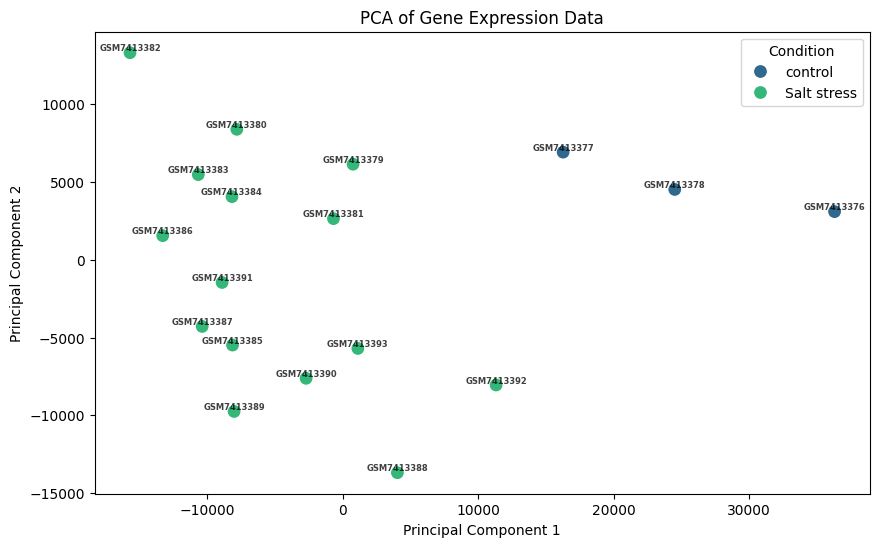

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


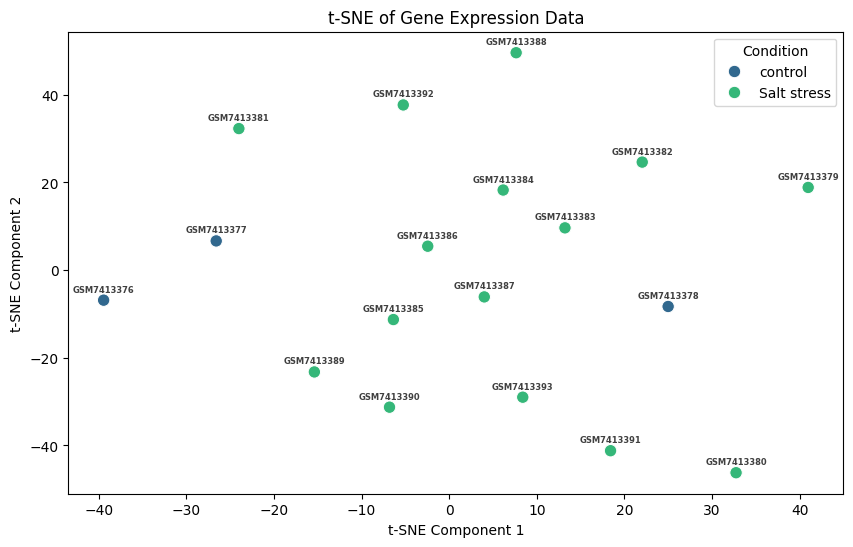

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


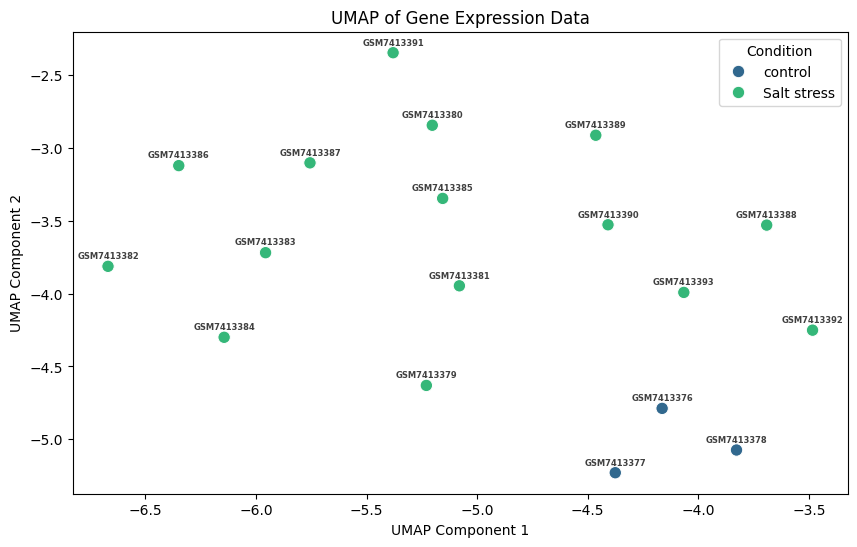

In [ ]:
# Example Usage
# Replace with paths to your count matrix and metadata files
count_matrix_file = 'Count_Data_GSE233233_Zhongza_9.csv'
metadata_file = 'Meta_Data_GSE233233_Zhongza_9.csv'

# Load and visualize data
df = load_data(count_matrix_file, metadata_file)
visualize_dim_reduction(df)

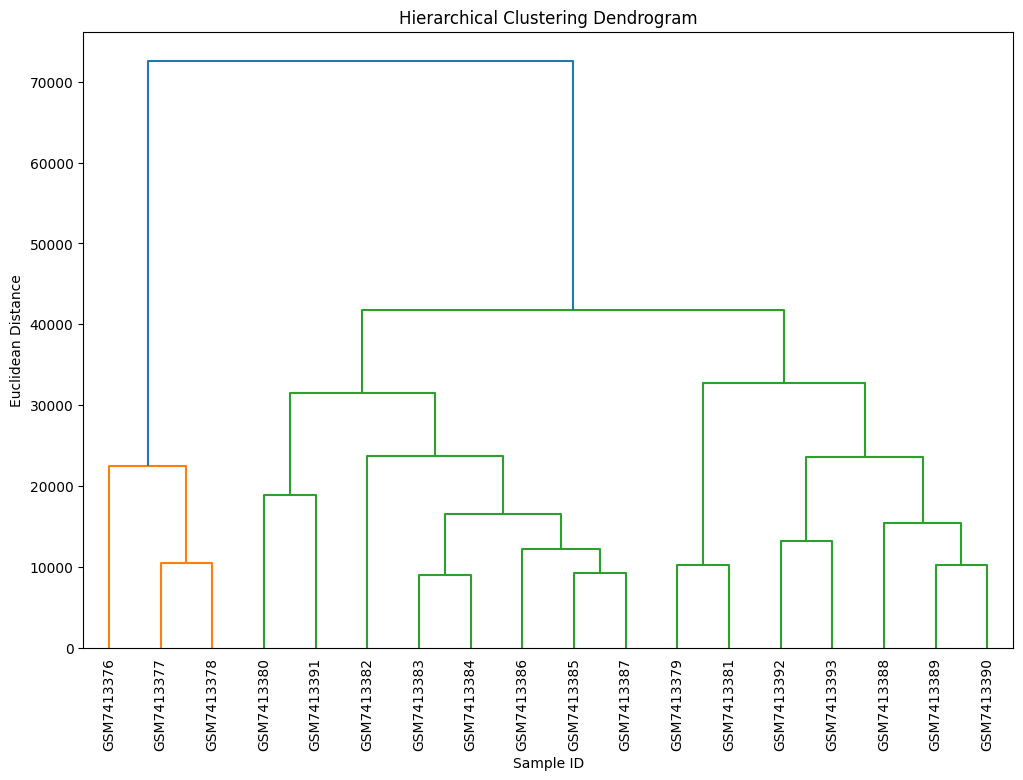

In [ ]:
def plot_hierarchical_tree(df):
    # Drop metadata columns to retain only expression data
    X = df.drop(columns=['SampleID', 'condition'])

    # Calculate pairwise distances
    distance_matrix = pdist(X, metric='euclidean')

    # Perform hierarchical clustering
    linkage_matrix = linkage(distance_matrix, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(
        linkage_matrix,
        labels=df['SampleID'].values,
        leaf_rotation=90,  # Rotate labels for better readability
        leaf_font_size=10  # Font size for labels
    )

    import matplotlib as mpl
    mpl.rcParams['pdf.fonttype'] = 42  # Ensures text is stored as text, not outlines
    mpl.rcParams['ps.fonttype'] = 42  # Same for PS files

    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample ID')
    plt.ylabel('Euclidean Distance')
    # Save the plot as a PDF
    plt.savefig("hTree_GSE233233_Zhongza_9.pdf", format="pdf")
    plt.show()
    plt.show()


# Example Usage
# Replace with paths to your count matrix and metadata files
count_matrix_file = 'Normalized_GSE233233_Zhongza_9.csv'
metadata_file = 'Meta_Data_GSE233233_Zhongza_9.csv'

# Load and visualize data
df = load_data(count_matrix_file, metadata_file)
plot_hierarchical_tree(df)
